In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf

In [ ]:
train_dir= '/content/drive/MyDrive/dataset/Training'
test_dir = '/content/drive/MyDrive/dataset/Testing'

batch_size = 32
img_height = 150
img_width = 150

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=143,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 8977 files belonging to 4 classes.
Using 7182 files for training.


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=143,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 8977 files belonging to 4 classes.
Using 1795 files for validation.


In [ ]:
class_names= train_data.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


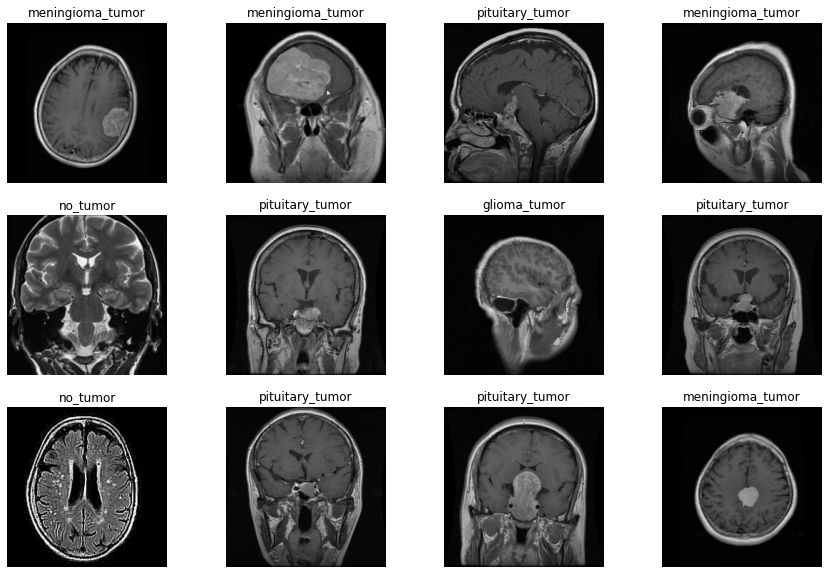

In [ ]:
plt.figure(figsize=(15, 10))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
meningioma = 0
notumor = 0
glioma = 0
pituitary = 0

for images, labels in train_data:
    for i in range(len(images)):
        #print(class_names[labels[i]])
        if class_names[labels[i]] == 'meningioma_tumor':
            meningioma +=1
        elif class_names[labels[i]] == 'no_tumor':
            notumor +=1
        elif class_names[labels[i]] == 'glioma_tumor':
            glioma +=1
        elif class_names[labels[i]] == 'pituitary_tumor':
            pituitary +=1
            
            
print('meningioma : ', meningioma)
print('glioma : ', glioma)
print('pituitary : ', pituitary)
print('notumor : ', notumor)

meningioma :  1743
glioma :  1725
pituitary :  1816
notumor :  1898


In [ ]:
fig=px.pie(values = [meningioma+glioma+pituitary,notumor], names=['tumor','notumor'],hole=0.425)
fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x= [meningioma,glioma,pituitary,notumor],
            y= ['Meningioma','Glioma','Pituitary','No tumor'],
            orientation='h'))

fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45)


fig.show()

In [ ]:
fig=px.pie(values = [meningioma,glioma,pituitary,notumor], names=['Meningioma','Glioma','Pituitary','No'],hole=0.425)
fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()